In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter



#Load data
raw_x, raw_y = np.loadtxt("ex1data1.txt", delimiter=',', usecols=(0,1), unpack=True)

In [10]:
#number of training examples
m = raw_x.size
print(m)

97


Text(0.5, 1.0, 'My first plot')

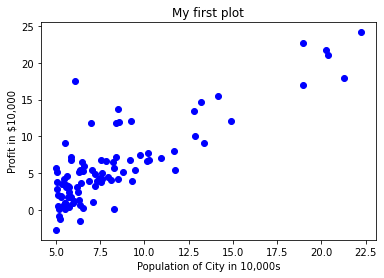

In [11]:
%matplotlib inline
plt.plot(raw_x,raw_y, 'bo')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.title("My first plot")

In [12]:
X = np.vstack( ( np.ones( (m), dtype=np.float64 ), raw_x ) ).T
theta = np.zeros(2)

In [13]:
def compute_cost(x, y, theta):
    m = y.size
    h = x @ theta
    error = np.square(h - y)
    return error.sum() * (1/(2*m))


print(compute_cost(X, raw_y, theta))

32.072733877455676


In [14]:
num_iter = 1500
alpha = 0.01
theta = np.zeros(2)
def gradient_descent(x, y, theta, alpha, iteration):
    m = y.size
    i = 0
    temp = np.zeros_like(theta)
    J_history = np.zeros(iteration)
    theta_history = np.zeros((iteration, 2))
    for i in range(iteration):
        h = x @ theta
        j = 0
        for j in range(2):
            temp[j] = (alpha/m)*(np.sum((h - y)*x[:,j]))
        theta -= temp
        #print(theta)
        J_history[i] = compute_cost(x, y, theta)
        theta_history[i] = theta
        
    return theta, J_history, theta_history


theta, J_history, theta_history = gradient_descent(X, raw_y, theta, alpha, num_iter)

n = np.arange(num_iter)
#%matplotlib notebook
#plt.plot(n, J_history)

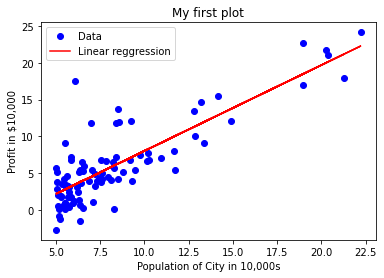

In [15]:
%matplotlib inline
plt.plot(raw_x,raw_y, 'bo', label='Data')
plt.plot(X[:,1], X @ theta, 'r', label='Linear reggression')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.title("My first plot")
plt.legend()
plt.show()

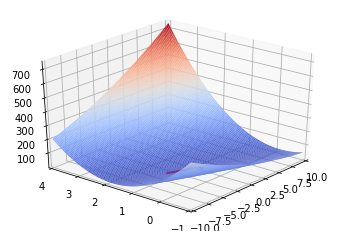

In [16]:
%matplotlib inline

theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

i = 0
j = 0
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X, raw_y, t)
    

t0, t1 = np.meshgrid(theta0_vals, theta1_vals)
#J_vals = J_vals.T
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(t0, t1, J_vals.T, rstride=1, cstride=1, cmap=cm.coolwarm, edgecolor='none')
line = ax.plot(theta_history[:,0], theta_history[:,1], J_history, 'r', linewidth=2)


ax.set_xlim(-10,10)
ax.set_ylim(-1,4)
ax.view_init(30,-140)

plt.show()